In [20]:
import pandas as pd

df = pd.read_csv("TWS_Model_Input.csv")
df.dropna(inplace=True)
df["Date"] = pd.to_datetime(df["Month"], format="%Y_%m")
df
df.to_csv('new_TWS_Model_Input.csv', index=False)

In [19]:
df

,Month,Longitude,Latitude,TWS_tavg_mean,aet_sum,precipitation,ro_sum,soil_mean,tmmn_mean,tmmx_mean,Date
24,2003_02,73.212696,31.665614,644.97156,550.0,70.595780,3.0,10.0,83.0,225.0,2003-02-01
25,2003_02,73.437274,31.665614,657.42566,595.0,83.737564,3.0,22.0,84.0,222.0,2003-02-01
26,2003_02,73.661853,31.665614,817.91895,602.0,84.652340,3.0,44.0,85.0,222.0,2003-02-01
27,2003_02,73.886432,31.665614,817.91895,606.0,69.327415,4.0,83.0,86.0,222.0,2003-02-01
28,2003_02,74.111011,31.665614,836.26514,605.0,62.583984,4.0,175.0,87.0,220.0,2003-02-01
...,...,...,...,...,...,...,...,...,...,...,...
609903,2023_12,73.886432,21.784146,1187.44150,231.0,4.399602,0.0,508.0,135.0,310.0,2023-12-01
609904,2023_12,74.111011,21.784146,1138.94210,139.0,4.856245,0.0,374.0,129.0,304.0,2023-12-01
609905,2023_12,74.335590,21.784146,1143.05370,116.0,5.811231,0.0,324.0,132.0,309.0,2023-12-01
609906,2023_12,74.560169,21.784146,1162.18580,98.0,3.441996,0.0,267.0,131.0,310.0,2023-12-01


In [21]:
csv_file = "TWS_Pred_Input1.csv"  # Replace with the actual CSV file
df1 = pd.read_csv(csv_file)
df1.dropna(inplace=True)
df1["Date"] = pd.to_datetime(df1["Month"], format="%Y_%m")
df1

,Month,Longitude,Latitude,TWS_tavg_mean,aet_sum,precipitation,ro_sum,soil_mean,tmmn_mean,tmmx_mean,Date
128,2003_02,73.661853,31.575782,657.42566,603.0,92.135190,3.0,21.0,84.0,222.0,2003-02-01
129,2003_02,73.706769,31.575782,657.42566,602.0,93.187584,3.0,24.0,85.0,222.0,2003-02-01
130,2003_02,73.751685,31.575782,817.91895,604.0,90.842030,3.0,25.0,85.0,222.0,2003-02-01
131,2003_02,73.796601,31.575782,817.91895,605.0,82.646610,3.0,55.0,85.0,222.0,2003-02-01
132,2003_02,73.841516,31.575782,817.91895,605.0,79.341210,3.0,57.0,85.0,222.0,2003-02-01
...,...,...,...,...,...,...,...,...,...,...,...
14699690,2023_12,74.200842,21.694314,1138.94210,135.0,0.000000,0.0,369.0,129.0,303.0,2023-12-01
14699691,2023_12,74.245758,21.694314,1143.05370,129.0,5.335234,0.0,353.0,135.0,315.0,2023-12-01
14699692,2023_12,74.290674,21.694314,1143.05370,124.0,6.006587,0.0,341.0,136.0,316.0,2023-12-01
14699693,2023_12,74.335590,21.694314,1143.05370,119.0,7.141133,0.0,327.0,139.0,321.0,2023-12-01


In [22]:
from sklearn.cluster import KMeans

# Combine all unique coordinates from both datasets
all_coords = pd.concat([
    df[['Latitude', 'Longitude']],
    df1[['Latitude', 'Longitude']]
]).drop_duplicates()

# Fit clustering on all
kmeans = KMeans(n_clusters=10, random_state=42)
all_coords['cluster_id'] = kmeans.fit_predict(all_coords[['Latitude', 'Longitude']])

# Merge back to df_train and df_pred
df = df.merge(all_coords, on=['Latitude', 'Longitude'], how='left')
df1 = df1.merge(all_coords, on=['Latitude', 'Longitude'], how='left')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
df1

,Month,Longitude,Latitude,TWS_tavg_mean,aet_sum,precipitation,ro_sum,soil_mean,tmmn_mean,tmmx_mean,Date,cluster_id
0,2003_02,73.661853,31.575782,657.42566,603.0,92.135190,3.0,21.0,84.0,222.0,2003-02-01,2
1,2003_02,73.706769,31.575782,657.42566,602.0,93.187584,3.0,24.0,85.0,222.0,2003-02-01,2
2,2003_02,73.751685,31.575782,817.91895,604.0,90.842030,3.0,25.0,85.0,222.0,2003-02-01,2
3,2003_02,73.796601,31.575782,817.91895,605.0,82.646610,3.0,55.0,85.0,222.0,2003-02-01,2
4,2003_02,73.841516,31.575782,817.91895,605.0,79.341210,3.0,57.0,85.0,222.0,2003-02-01,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9607271,2023_12,74.200842,21.694314,1138.94210,135.0,0.000000,0.0,369.0,129.0,303.0,2023-12-01,5
9607272,2023_12,74.245758,21.694314,1143.05370,129.0,5.335234,0.0,353.0,135.0,315.0,2023-12-01,5
9607273,2023_12,74.290674,21.694314,1143.05370,124.0,6.006587,0.0,341.0,136.0,316.0,2023-12-01,5
9607274,2023_12,74.335590,21.694314,1143.05370,119.0,7.141133,0.0,327.0,139.0,321.0,2023-12-01,5


In [28]:
df1.to_csv('new_TWS_Pred_Input5.csv', index=False)

In [24]:
df.to_csv('new_TWS_Model_Input5.csv', index=False)

Mean R² Score: 0.8123519639306236
Standard Deviation of R² Scores: 0.002704732280061428

Variable Importance:
         Feature  Importance
3      soil_mean    0.467589
6     cluster_id    0.208724
0        aet_sum    0.072991
5      tmmx_mean    0.072868
4      tmmn_mean    0.072328
1  precipitation    0.057406
7      month_sin    0.022029
8      month_cos    0.014413
2         ro_sum    0.011654
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False}
Best R² Score: 0.6920649898491764

Mean Squared Error on Full Dataset with Best Model: 13299.851989787856
R² Score on Full Dataset with Best Model: 0.8695919983450964


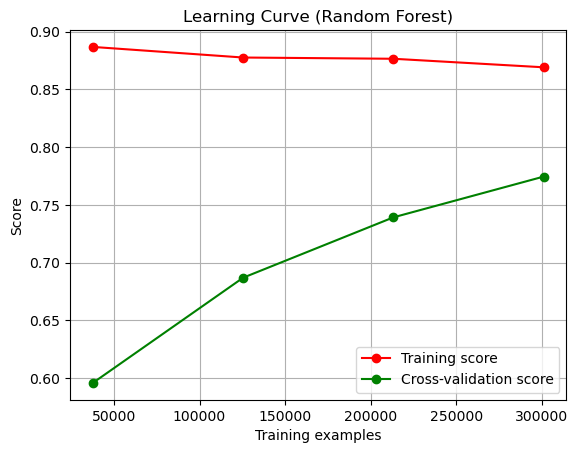

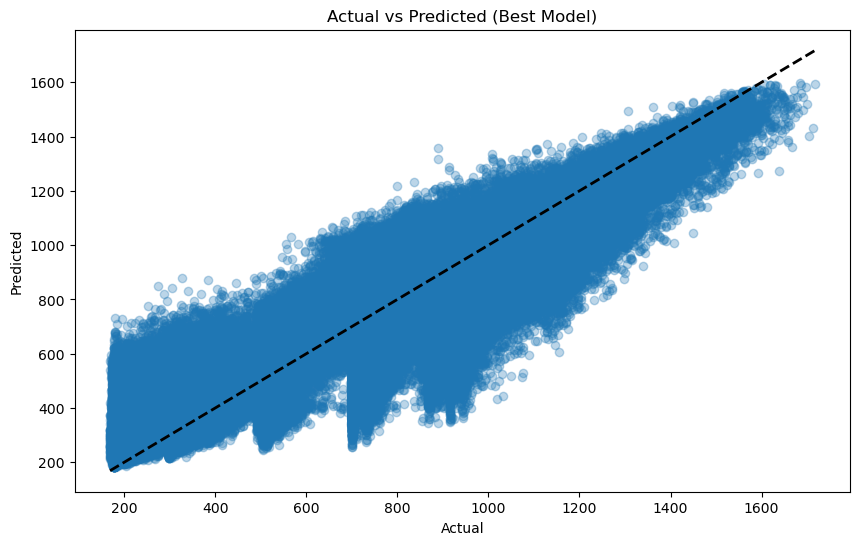

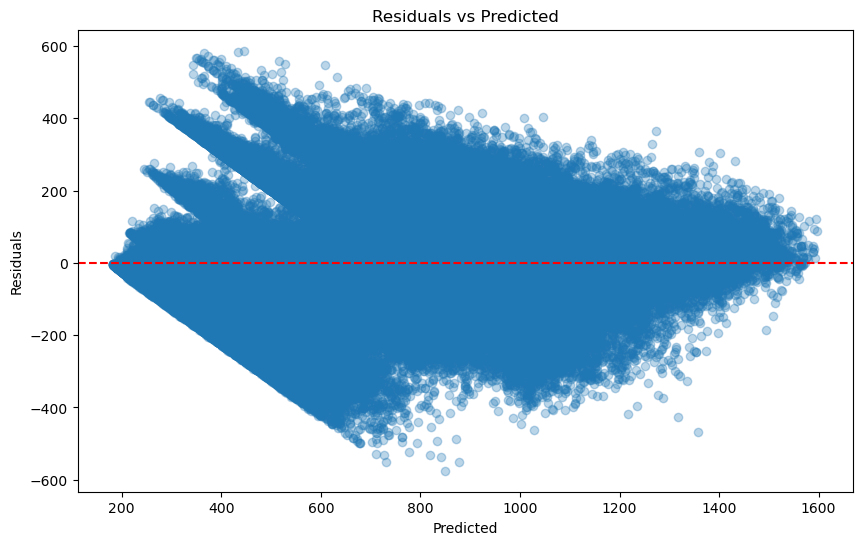

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, learning_curve, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("new_TWS_Model_Input5.csv")
# Extract month from date
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Apply cyclic encoding to month
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)


# ----------------------------
# Model Training
# ----------------------------

# Define features and target
X = df.drop(columns=['TWS_tavg_mean', 'Longitude', 'Latitude', 'Date', 'Month'])  # 'Month' no longer needed after encoding
Y = df['TWS_tavg_mean']

# Initialize Random Forest Model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=3)

# Cross-validation
kf = KFold(n_splits=15, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X, Y, cv=kf, scoring='r2')
print(f"Mean R² Score: {np.mean(cv_scores)}")
print(f"Standard Deviation of R² Scores: {np.std(cv_scores)}")

# Feature importance
rf_model.fit(X, Y)
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nVariable Importance:")
print(feature_importance_df)

# Hyperparameter tuning
param_dist = {
    'max_depth': [10, 30, 50, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10, cv=5,
    n_jobs=3, verbose=2,
    scoring='r2', random_state=42
)
random_search.fit(X, Y)

print("\nBest Parameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)

# Final model
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X, Y)
Y_pred_best = best_rf_model.predict(X)
mse_best = mean_squared_error(Y, Y_pred_best)
r2_best = r2_score(Y, Y_pred_best)
print(f"\nMean Squared Error on Full Dataset with Best Model: {mse_best}")
print(f"R² Score on Full Dataset with Best Model: {r2_best}")

# ----------------------------
# Visualizations
# ----------------------------

def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(0.1, 0.8, 4)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=3, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

plot_learning_curve(best_rf_model, "Learning Curve (Random Forest)", X, Y, cv=kf)

# Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(Y, Y_pred_best, alpha=0.3)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Best Model)')
plt.show()

# Residuals
residuals = Y - Y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred_best, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


In [26]:
import joblib

# Save the model to a .joblib file
model_filename = 'TWSModel2.joblib'
joblib.dump(best_rf_model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to TWSModel2.joblib


In [33]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Load the trained RandomForestRegressor model
rf_model = joblib.load('TWSModel.joblib')

# Ensure the model is correctly loaded
if not isinstance(rf_model, type(None)):
    print("Model successfully loaded:", type(rf_model))
else:
    raise ValueError("Error loading the model. Check the joblib file.")

# Load dataset
csv_file = "new_TWS_Pred_Input2.csv"  # Replace with the actual CSV file
df = pd.read_csv(csv_file)

# Extract month from date
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Apply cyclic encoding to month
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)




print("Loaded DataFrame shape:", df.shape)

# Ensure 'lwe_thickness_mean' exists in the DataFrame
if 'TWS_tavg_mean' not in df.columns:
    raise ValueError("Column 'TWS_tavg_mean' not found in the dataset.")

# Prepare input features (X)
X = df.drop(columns=['TWS_tavg_mean', 'Longitude', 'Latitude', 'Date', 'Month'])

# Check if X is a DataFrame
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)

print("Feature DataFrame shape:", X.shape)

# Ensure feature names match model expectations
model_features = set(rf_model.feature_names_in_)
df_features = set(X.columns)

# Check for missing columns
missing_cols = model_features - df_features
if missing_cols:
    print("Warning: Missing columns in input data:", missing_cols)
    for col in missing_cols:
        X[col] = 0  # Fill missing columns with zeros

# Check for extra columns
extra_cols = df_features - model_features
if extra_cols:
    print("Warning: Extra columns detected in input data, removing them:", extra_cols)
    X = X[list(model_features)]  # Keep only relevant features

# Ensure correct data types
X = X.astype(float)
X = X.fillna(0)  # Handle missing values

try:
    predictions = rf_model.predict(X)
    print("Predictions successfully made.")
except Exception as e:
    print("Error during prediction:", e)
    predictions = None  # Ensure predictions exists to avoid NameError

# Assuming actual target values are available
actual_y = df['TWS_tavg_mean']
if predictions is None:
    raise ValueError("Prediction failed. Check model compatibility with input features.")
else:
    # Compute R² score
    r2 = r2_score(actual_y, predictions)
    print(f"R² score between actual and predicted values: {r2:.4f}")



# Add predicted values as a new column to the original DataFrame
df['TWS_tavg_mean_pred'] = predictions

# Save the DataFrame with predicted values to a new CSV file
#output_csv = "TWSPRED.csv"
#df.to_csv(output_csv, index=False)
#print(f"Predictions saved to {output_csv}")


Model successfully loaded: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Loaded DataFrame shape: (9607276, 13)
Feature DataFrame shape: (9607276, 8)
Predictions successfully made.
R² score between actual and predicted values: 0.7331


In [34]:
correlation = np.corrcoef(actual_y, predictions)[0, 1]
print("Correlation:", correlation)

Correlation: 0.8570159757370954


In [35]:
rmse = np.sqrt(np.mean((actual_y - predictions) ** 2))
print("RMSE:", rmse)

RMSE: 165.71717121628137


In [36]:
mse = np.mean((actual_y - predictions) ** 2)
print("MSE:", mse)

MSE: 27462.180835926316


In [37]:
import numpy as np

def nse(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    numerator = np.sum((actual - predicted) ** 2)
    denominator = np.sum((actual - np.mean(actual)) ** 2)
    return 1 - numerator / denominator


print("NSE:", nse(actual_y, predictions))


NSE: 0.733138126879777


In [38]:
from sklearn.metrics import r2_score

# actual_y = [...]
# predictions = [...]
r2 = r2_score(actual_y, predictions)
print("R^2:", r2)


R^2: 0.733138126879777
